In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\MARCELO\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
fontsize_xylabel = 13
fontsize_tick = 14

## Half Space Tree

Balanced Accuracy:  0.8008186111111111
Precision:  0.8672000247833394
Recall:  0.83979
Specificity:  0.7618472222222222
              precision    recall  f1-score   support

           0       0.72      0.76      0.74    216000
           1       0.87      0.84      0.85    400000

    accuracy                           0.81    616000
   macro avg       0.79      0.80      0.80    616000
weighted avg       0.82      0.81      0.81    616000



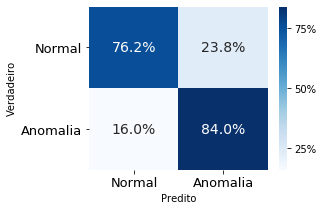

In [3]:
y_true = [0] * 216000 + [1] * 400000
y_pred = [0] * 164559 + [1] * 51441 + [0] * 64084 + [1] * 335916


data = confusion_matrix(y_true, y_pred, normalize='true')
tn, fp, fn, tp = data.ravel()
print('Balanced Accuracy: ', balanced_accuracy_score(y_true, y_pred))
print('Precision: ', precision_score(y_true, y_pred))
print('Recall: ', recall_score(y_true, y_pred))
print('Specificity: ', (tn / (tn+fp)))
print(classification_report(y_true, y_pred))

inputed = ['Normal', 'Anomalia']
predicted = ['Normal', 'Anomalia']

df = pd.DataFrame(np.array(data), index=inputed, columns=predicted)

fig, axs = plt.subplots(figsize=(4,3))
cm = sns.heatmap(df, annot=True, fmt='.1%', cmap='Blues', rasterized=True, annot_kws={"fontsize":fontsize_tick})
cm.set_xticklabels(cm.get_xticklabels(), rotation = 0, size=fontsize_xylabel)
cm.set_yticklabels(cm.get_yticklabels(), rotation = 0, size=fontsize_xylabel)

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

colorbar = cm.collections[0].colorbar
colorbar.set_ticks([0, .25, .5, .75, 1])
colorbar.set_ticklabels(['0%','25%', '50%', '75%', '100%'])

fig = cm.get_figure()
fig.savefig("6_detector_hst_heatmap.pdf", bbox_inches='tight')

In [217]:
r = pd.read_pickle('../detector/half_space_tree_river/outputs/hst_resultado.pkl')
r[['ba', 'precision', 'recall', 'specificity']] *= 100
r['Hiperparâmetros'] = r['n_trees'] + ',' + r['h_tree'] + ',' + r['l_window']
r = r.rename(columns={'ba': 'Balanced Accuracy', 'specificity': 'Especificidade'})
r = r.sort_values(by=['Hiperparâmetros'])

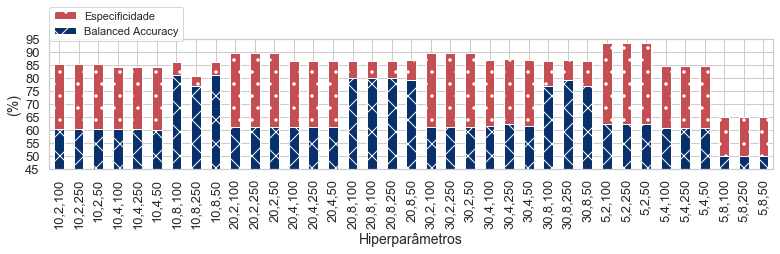

In [229]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(11,4))

cm = r.plot.bar(y=['Especificidade'], x='Hiperparâmetros', hatch='.', ax=ax1, rasterized=True, width=.5, align='center', color='r', fontsize=fontsize_xylabel)
cm = r.plot.bar(y=['Balanced Accuracy'], x='Hiperparâmetros', hatch='x', ax=ax1, rasterized=True, width=.5, align='center', cmap='Blues_r', fontsize=fontsize_xylabel)

ax1.set_xlabel('Hiperparâmetros',fontdict={'fontsize':fontsize_tick})
ax1.set_ylabel('(%)',fontdict={'fontsize':fontsize_tick})
ax1.set_ylim([45, 95])
ax1.yaxis.set_ticks(np.arange(45, 100, 5))
plt.legend(bbox_to_anchor=(0, 1.05, 0.185, 0.2), borderaxespad=0)
plt.tight_layout()
plt.xticks(rotation=90, ha="center")
plt.show()

fig = cm.get_figure()
fig.savefig("6_detector_hst_comparacao_ba_especificidade.pdf", bbox_inches='tight')

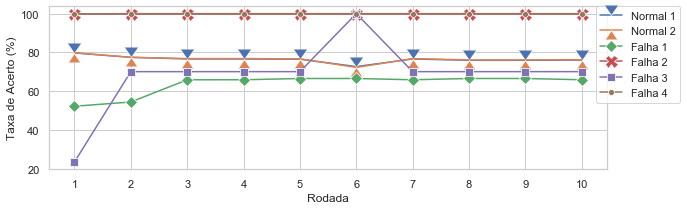

In [9]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(figsize=(10,3))

data = [
    [79.69444444,79.79833333,52.196,100,23.464,99.899],
    [77.44722222,77.44,54.38,100,70.053,100],
    [76.60555556,76.8,65.853,100,70.053,100],
    [76.58888889,76.79277778,65.862,100,70.053,100],
    [76.48611111,76.67777778,66.512,100,70.053,100],
    [72.66388889,72.21111111,66.513,100,100,100],
    [76.59722222,76.79888889,65.862,100,70.053,100],
    [75.90833333,76.10055556,66.513,100,70.053,100],
    [75.90833333,76.10055556,66.513,100,70.053,100],
    [76.01944444,76.21777778,65.863,100,70.053,100],

]

data = pd.DataFrame(data, index=np.arange(1,11))

markers = [7, 6, 'D', 'X', 's', '.']
sizes = [14,12,8,13,8,12]

for i in np.arange(0,6):
    cm = sns.lineplot(data=data.iloc[:,i],  palette=sns.color_palette("mako_r", 6), markersize=sizes[i], marker=markers[i], legend='full')

cm.legend(['Normal 1', 'Normal 2', 'Falha 1', 'Falha 2', 'Falha 3', 'Falha 4'], bbox_to_anchor=(.98, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(1,11))
plt.xlabel('Rodada')
plt.ylabel('Taxa de Acerto (%)')

fig = cm.get_figure()
fig.savefig("6_detector_hst_hit_incremento.pdf", bbox_inches='tight')

## Autoencoder

In [209]:
columns = []
rows = []
with open('../detector/autoencoder/outputs/output-dr_2-ts_0.8-lf_096-wl_1_final.txt') as f:
    lines = f.readlines()

for n, l in enumerate(lines):
    if n == 6:
        columns = l.rstrip().split(';')

    if n > 6:
        rows.append([float(x) for x in l.split(';')])

df = pd.DataFrame(rows, columns=columns)

df

,mu_full,mu_step,mu_agg,mu_online,std_full,std_step,std_agg,std_online,phi_full,phi_step,...,f3_hit_step,f4_hit_step,f1_hit_agg,f2_hit_agg,f3_hit_agg,f4_hit_agg,f1_hit_online,f2_hit_online,f3_hit_online,f4_hit_online
0,0.025800,0.026048,0.026048,0.026048,0.038156,0.038267,0.038267,0.039073,0.063956,0.064315,...,0.59036,1.0,0.35667,1.0,0.59036,1.0,0.34914,1.0,0.57972,1.0
1,0.018699,0.019811,0.018861,0.022929,0.033231,0.038261,0.025192,0.048227,0.051930,0.058071,...,0.76527,1.0,0.79875,1.0,0.98430,1.0,0.30599,1.0,0.55269,1.0
2,0.017019,0.016699,0.014750,0.020852,0.031411,0.030959,0.017445,0.051699,0.048429,0.047657,...,0.97235,1.0,0.98227,1.0,1.00000,1.0,0.29135,1.0,0.50971,1.0
3,0.016529,0.016316,0.012382,0.019718,0.030488,0.029090,0.012751,0.053816,0.047017,0.045406,...,0.99940,1.0,0.99157,1.0,1.00000,1.0,0.28707,1.0,0.51486,1.0
4,0.015807,0.016109,0.010699,0.018997,0.030085,0.031767,0.009672,0.055721,0.045892,0.047877,...,0.99788,1.0,0.99666,1.0,1.00000,1.0,0.28404,1.0,0.48599,1.0
5,0.015890,0.016025,0.009561,0.018501,0.029889,0.030037,0.007497,0.057091,0.045779,0.046062,...,0.99959,1.0,0.99924,1.0,1.00000,1.0,0.28701,1.0,0.51703,1.0
6,0.015271,0.016063,0.008684,0.018153,0.029508,0.032428,0.005968,0.058416,0.044779,0.048491,...,0.99930,1.0,0.99950,1.0,1.00000,1.0,0.28459,1.0,0.55872,1.0
7,0.014886,0.014103,0.007960,0.017647,0.029477,0.026488,0.004842,0.059190,0.044363,0.040592,...,1.00000,1.0,0.99964,1.0,1.00000,1.0,0.27890,1.0,0.62557,1.0
8,0.014568,0.014062,0.007386,0.017248,0.029311,0.028273,0.004020,0.059956,0.043880,0.042335,...,0.99958,1.0,0.99998,1.0,1.00000,1.0,0.27817,1.0,0.57684,1.0
9,0.014744,0.014999,0.006982,0.017024,0.028979,0.030690,0.003447,0.060748,0.043723,0.045690,...,0.99767,1.0,0.99999,1.0,1.00000,1.0,0.27944,1.0,0.58281,1.0


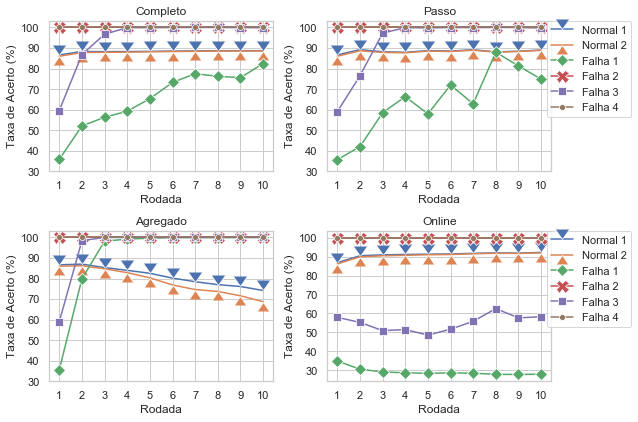

In [215]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2,2, figsize=(9,6))

prefix = ['x_test_hit_', 'normal_2_hit_', 'f1_hit_', 'f2_hit_', 'f3_hit_', 'f4_hit_']
suffix = ['full', 'step', 'agg', 'online']
title = ['Completo', 'Passo', 'Agregado', 'Online']
markers = [7, 6, 'D', 'X', 's', '.']
sizes = [14,12,8,13,8,12]

for t in np.arange(0,4):
    data = df.loc[:9, [prefix[n]+suffix[t] for n in np.arange(0,6)]]
    eixo = axs[int(t/2), t%2]

    plt.setp(eixo, xlabel='Rodada', ylabel='Taxa de Acerto (%)', title=title[t])

    for i in np.arange(0,6):
        cm = sns.lineplot(data=data.iloc[:,i] * 100,  palette=sns.color_palette("mako_r", 6), markersize=sizes[i], marker=markers[i], legend='full', ax=eixo)
        cm.set_xticks(range(10))
        cm.set_xticklabels(np.arange(1,11))
        if t in [1,3]:
            cm.legend(['Normal 1', 'Normal 2', 'Falha 1', 'Falha 2', 'Falha 3', 'Falha 4'], bbox_to_anchor=(.98, 1), loc=2, borderaxespad=0.)

    eixo.yaxis.set_ticks(np.arange(30, 110, 10))

fig.tight_layout(pad=1)
fig = cm.get_figure()
fig.savefig("6_detector_autoencoder_hit_incremento.pdf", bbox_inches='tight')

In [197]:
r = pd.read_pickle('../detector/autoencoder/outputs/autoencoder_resultado.pkl')
r[['ba', 'precision', 'recall', 'specificity']] *= 100
r['Hiperparâmetros'] = r['arch'].apply(lambda x: x.replace(', ', 'x')) + ', ' + r['output_layer'] + ', ' + r['optimizer'] + ', ' + r['loss_function']
r = r.rename(columns={'ba': 'Balanced Accuracy', 'specificity': 'Especificidade'})
r['Hiperparâmetros'] = r['Hiperparâmetros'].apply(lambda x: x.replace('()', ''))
r = r.sort_values(by=['Hiperparâmetros'])

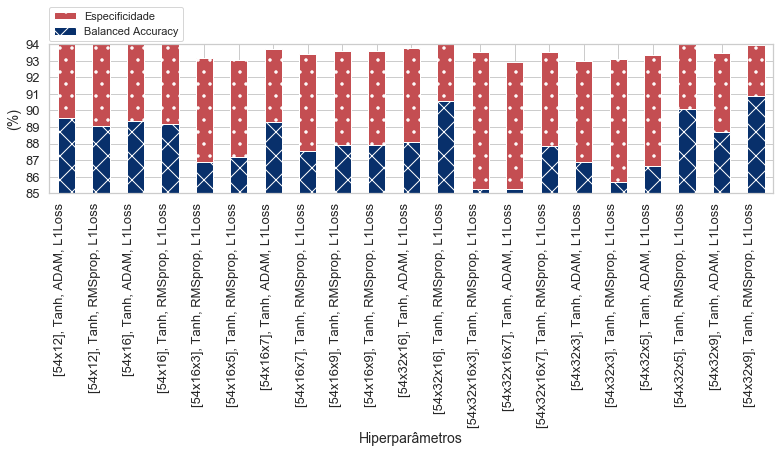

In [201]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(11,6))

cm = r.plot.bar(y=['Especificidade'], x='Hiperparâmetros', hatch='.', ax=ax1, rasterized=True, width=.5, align='center', color='r', fontsize=fontsize_xylabel)
cm = r.plot.bar(y=['Balanced Accuracy'], x='Hiperparâmetros', hatch='x', ax=ax1, rasterized=True, width=.5, align='center', cmap='Blues_r', fontsize=fontsize_xylabel)

ax1.set_xlabel('Hiperparâmetros',fontdict={'fontsize':fontsize_tick})
ax1.set_ylabel('(%)',fontdict={'fontsize':fontsize_tick})
ax1.set_ylim([85, 94])
ax1.yaxis.set_ticks(np.arange(85, 95, 1))
plt.tight_layout()
plt.xticks(rotation=90, ha="right")
plt.legend(bbox_to_anchor=(0, 1.02, 0.18, 0.2), borderaxespad=0)
plt.show()

fig = cm.get_figure()
fig.savefig("6_detector_autoencoder_comparacao_ba_especificidade.pdf", bbox_inches='tight')

In [202]:
r

,arch,output_layer,batch_size,optimizer,loss_function,mu,std,x_train_loss,x_test_loss,normal_2_loss,...,samples_n2,samples_f1,samples_f2,samples_f3,samples_f4,Balanced Accuracy,precision,recall,Especificidade,Hiperparâmetros
147,"[54, 12]",Tanh(),32.0,ADAM,L1Loss(),0.017104,0.037785,0.054889,NaN,NaN,...,8834.0,6332.0,10000.0,9949.0,10000.0,89.54625,93.984923,90.7025,93.984923,"[54x12], Tanh, ADAM, L1Loss"
525,"[54, 12]",Tanh(),32.0,RMSprop,L1Loss(),0.019606,0.033105,0.052711,NaN,NaN,...,8876.0,6055.0,10000.0,9695.0,10000.0,89.08000,94.096281,89.3750,94.096281,"[54x12], Tanh, RMSprop, L1Loss"
171,"[54, 16]",Tanh(),32.0,ADAM,L1Loss(),0.016247,0.035885,0.052132,NaN,NaN,...,8843.0,6219.0,10000.0,9880.0,10000.0,89.35625,93.993126,90.2475,93.993126,"[54x16], Tanh, ADAM, L1Loss"
549,"[54, 16]",Tanh(),32.0,RMSprop,L1Loss(),0.018808,0.032708,0.051516,NaN,NaN,...,8875.0,5947.0,10000.0,9952.0,10000.0,89.18875,94.042910,89.7475,94.042910,"[54x16], Tanh, RMSprop, L1Loss"
517,"[54, 16, 3]",Tanh(),32.0,RMSprop,L1Loss(),0.020051,0.035338,0.055389,NaN,NaN,...,8701.0,6519.0,10000.0,8033.0,10000.0,86.88000,93.192362,86.3800,93.192362,"[54x16x3], Tanh, RMSprop, L1Loss"
513,"[54, 16, 5]",Tanh(),32.0,RMSprop,L1Loss(),0.020339,0.035024,0.055363,NaN,NaN,...,8668.0,5251.0,10000.0,9714.0,10000.0,87.20375,93.076186,87.4125,93.076186,"[54x16x5], Tanh, RMSprop, L1Loss"
143,"[54, 16, 7]",Tanh(),32.0,ADAM,L1Loss(),0.017172,0.036746,0.053917,NaN,NaN,...,8753.0,6447.0,10000.0,9889.0,10000.0,89.31750,93.705031,90.8400,93.705031,"[54x16x7], Tanh, ADAM, L1Loss"
521,"[54, 16, 7]",Tanh(),32.0,RMSprop,L1Loss(),0.020516,0.034593,0.055109,NaN,NaN,...,8758.0,5352.0,10000.0,9614.0,10000.0,87.56500,93.434519,87.4150,93.434519,"[54x16x7], Tanh, RMSprop, L1Loss"
509,"[54, 16, 9]",Tanh(),32.0,RMSprop,L1Loss(),0.019897,0.034493,0.054390,NaN,NaN,...,8765.0,6002.0,10000.0,9149.0,10000.0,87.92750,93.596400,87.8800,93.596400,"[54x16x9], Tanh, RMSprop, L1Loss"
505,"[54, 16, 9]",Tanh(),32.0,RMSprop,L1Loss(),0.019897,0.034493,0.054390,NaN,NaN,...,8765.0,6002.0,10000.0,9149.0,10000.0,87.92750,93.596400,87.8800,93.596400,"[54x16x9], Tanh, RMSprop, L1Loss"


60000
Balanced Accuracy:  0.9086375
Precision:  0.9393643643643643
Recall:  0.938425
Specificity:  0.87885
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     20000
           1       0.94      0.94      0.94     40000

    accuracy                           0.92     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.92      0.92      0.92     60000



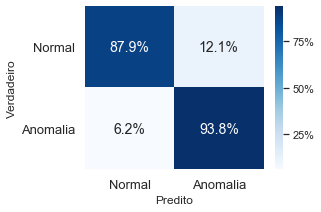

In [207]:
y_true = [0] * 20000 + [1] * 40000
y_pred = [0] * (8802+8775) + [1] * (20000-8802-8775) + [0] * (40000-8112-10000-9425-10000) + [1] * (8112+10000+9425+10000)

data = confusion_matrix(y_true, y_pred, normalize='true')
tn, fp, fn, tp = data.ravel()
print('Balanced Accuracy: ', balanced_accuracy_score(y_true, y_pred))
print('Precision: ', precision_score(y_true, y_pred))
print('Recall: ', recall_score(y_true, y_pred))
print('Specificity: ', (tn / (tn+fp)))
print(classification_report(y_true, y_pred))

inputed = ['Normal', 'Anomalia']
predicted = ['Normal', 'Anomalia']

df = pd.DataFrame(np.array(data), index=inputed, columns=predicted)

fig, axs = plt.subplots(figsize=(4,3))
cm = sns.heatmap(df, annot=True, fmt='.1%', cmap='Blues', rasterized=True, annot_kws={"fontsize":fontsize_tick})
cm.set_xticklabels(cm.get_xticklabels(), rotation = 0, size=fontsize_xylabel)
cm.set_yticklabels(cm.get_yticklabels(), rotation = 0, size=fontsize_xylabel)

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

colorbar = cm.collections[0].colorbar
colorbar.set_ticks([0, .25, .5, .75, 1])
colorbar.set_ticklabels(['0%','25%', '50%', '75%', '100%'])

fig = cm.get_figure()
fig.savefig("6_detector_autoencoder_heatmap.pdf", bbox_inches='tight')

## LOF

C:\Users\MARCELO\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


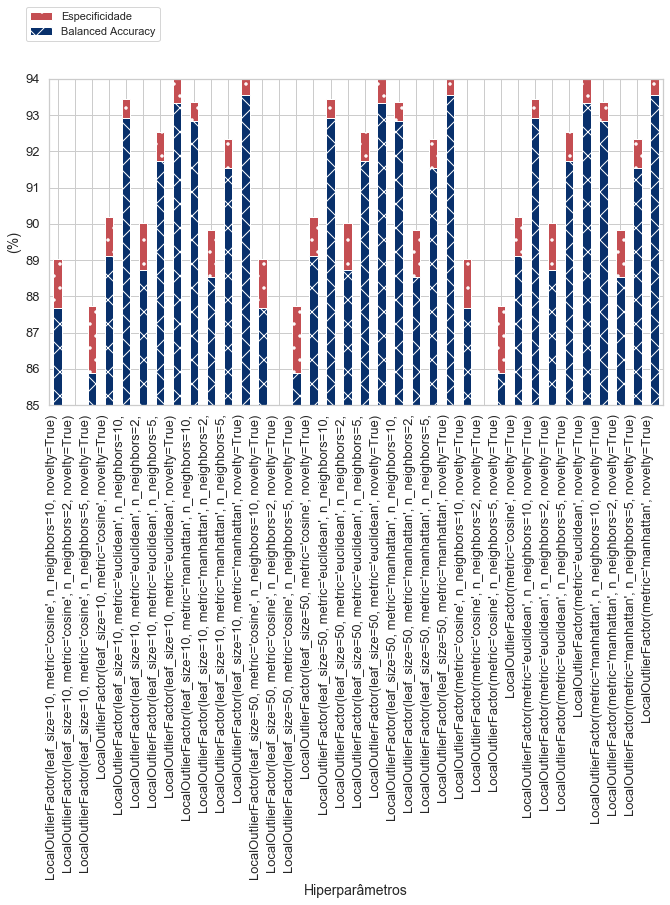

In [7]:
r = pd.read_pickle('../detector/baseline/outputs/lof_resultado.pkl')
r[['ba', 'precision', 'recall', 'specificity']] *= 100
#r['Hiperparâmetros'] = r['arch'].apply(lambda x: x.replace(', ', 'x')) + ', ' + r['output_layer'] + ', ' + r['optimizer'] + ', ' + r['loss_function']
r = r.rename(columns={'ba': 'Balanced Accuracy', 'specificity': 'Especificidade'})
#r['Hiperparâmetros'] = r['Hiperparâmetros'].apply(lambda x: x.replace('()', ''))
r['Hiperparâmetros'] = r['arch']
r = r.sort_values(by=['Hiperparâmetros'])

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(11,6))

cm = r.plot.bar(y=['Especificidade'], x='Hiperparâmetros', hatch='.', ax=ax1, rasterized=True, width=.5, align='center', color='r', fontsize=fontsize_xylabel)
cm = r.plot.bar(y=['Balanced Accuracy'], x='Hiperparâmetros', hatch='x', ax=ax1, rasterized=True, width=.5, align='center', cmap='Blues_r', fontsize=fontsize_xylabel)

ax1.set_xlabel('Hiperparâmetros',fontdict={'fontsize':fontsize_tick})
ax1.set_ylabel('(%)',fontdict={'fontsize':fontsize_tick})
ax1.set_ylim([85, 94])
ax1.yaxis.set_ticks(np.arange(85, 95, 1))
plt.tight_layout()
plt.xticks(rotation=90, ha="right")
plt.legend(bbox_to_anchor=(0, 1.02, 0.18, 0.2), borderaxespad=0)
plt.show()

fig = cm.get_figure()
fig.savefig("6_detector_lof_comparacao_ba_especificidade.pdf", bbox_inches='tight')

Balanced Accuracy:  0.9717317073170731
Precision:  0.90083578043822
Recall:  0.997
Specificity:  0.9464634146341463
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     41000
           1       0.90      1.00      0.95     20000

    accuracy                           0.96     61000
   macro avg       0.95      0.97      0.96     61000
weighted avg       0.97      0.96      0.96     61000



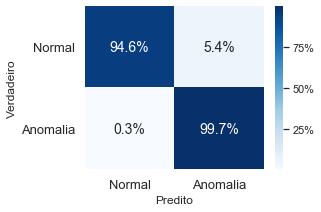

In [10]:
y_true = [0] * (36000+5000) + [1] * (5000 * 4)
y_pred = [0] * (34920+3885) + [1] * (2195) + [0] * 60 + [1] * (4990+5000+4950+5000)

data = confusion_matrix(y_true, y_pred, normalize='true')
tn, fp, fn, tp = data.ravel()
print('Balanced Accuracy: ', balanced_accuracy_score(y_true, y_pred))
print('Precision: ', precision_score(y_true, y_pred))
print('Recall: ', recall_score(y_true, y_pred))
print('Specificity: ', (tn / (tn+fp)))
print(classification_report(y_true, y_pred))

inputed = ['Normal', 'Anomalia']
predicted = ['Normal', 'Anomalia']

df = pd.DataFrame(np.array(data), index=inputed, columns=predicted)

fig, axs = plt.subplots(figsize=(4,3))
cm = sns.heatmap(df, annot=True, fmt='.1%', cmap='Blues', rasterized=True, annot_kws={"fontsize":fontsize_tick})
cm.set_xticklabels(cm.get_xticklabels(), rotation = 0, size=fontsize_xylabel)
cm.set_yticklabels(cm.get_yticklabels(), rotation = 0, size=fontsize_xylabel)

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

colorbar = cm.collections[0].colorbar
colorbar.set_ticks([0, .25, .5, .75, 1])
colorbar.set_ticklabels(['0%','25%', '50%', '75%', '100%'])

fig = cm.get_figure()
fig.savefig("6_detector_lof_heatmap.pdf", bbox_inches='tight')